In [1]:
%pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
os.makedirs('dataset', exist_ok=True)
figsize = (5, 4)

In [4]:
if not os.path.exists('./dataset/titanic-dataset.zip'):
  !curl -L -o ./dataset/titanic-dataset.zip https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset

# Descompactar os datasets

In [5]:
with zipfile.ZipFile('./dataset/titanic-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('./dataset')

# Explorer

In [6]:
df = pd.read_csv('./dataset/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Valores ausentes

In [9]:
df.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

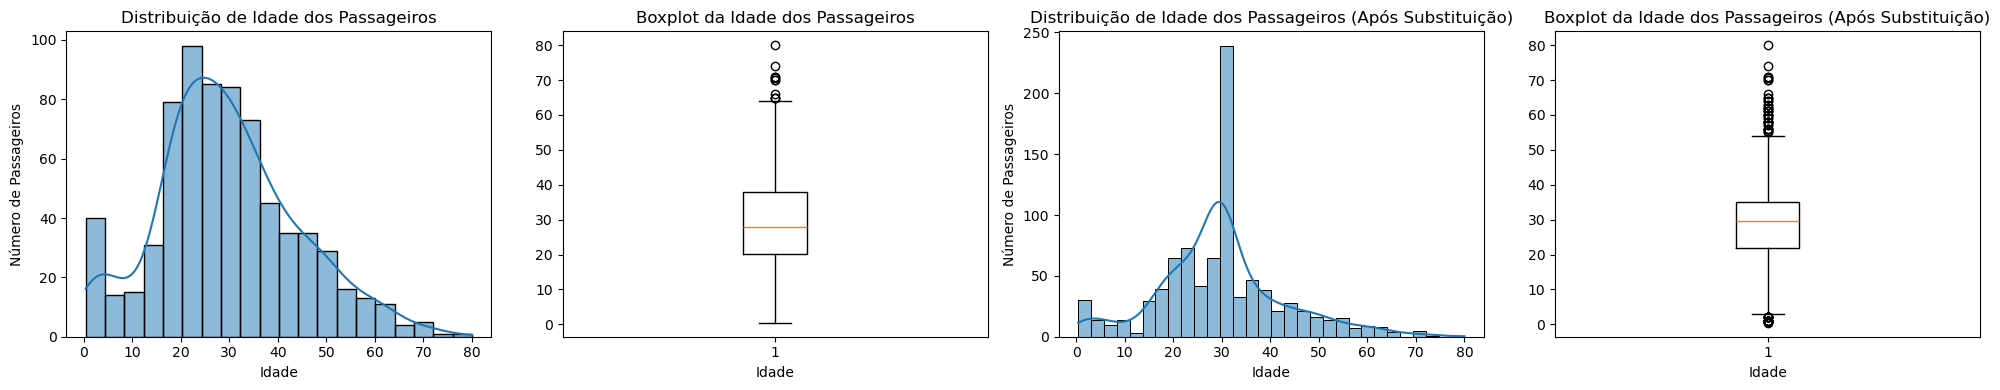

In [10]:
df_copy_normal = df.copy()
df_copy_mean = df.copy()

df_copy_mean['Age'] = df_copy_mean['Age'].fillna(df_copy_mean['Age'].mean())

n_rows = 1
n_coluns = 4

fig, ax = plt.subplots(nrows=n_rows, ncols=n_coluns, figsize=(figsize[0] * n_coluns, figsize[1] * n_rows))

sns.histplot(df_copy_normal['Age'].dropna(), kde=True, ax=ax[0])
ax[0].set_title('Distribuição de Idade dos Passageiros')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Número de Passageiros')

ax[1].boxplot(df_copy_normal['Age'].dropna())
ax[1].set_title('Boxplot da Idade dos Passageiros')
ax[1].set_xlabel('Idade')

sns.histplot(df_copy_mean['Age'], kde=True, ax=ax[2])
ax[2].set_title('Distribuição de Idade dos Passageiros (Após Substituição)')
ax[2].set_xlabel('Idade')
ax[2].set_ylabel('Número de Passageiros')

ax[3].boxplot(df_copy_mean['Age'])
ax[3].set_title('Boxplot da Idade dos Passageiros (Após Substituição)')
ax[3].set_xlabel('Idade')

plt.tight_layout()
plt.show()

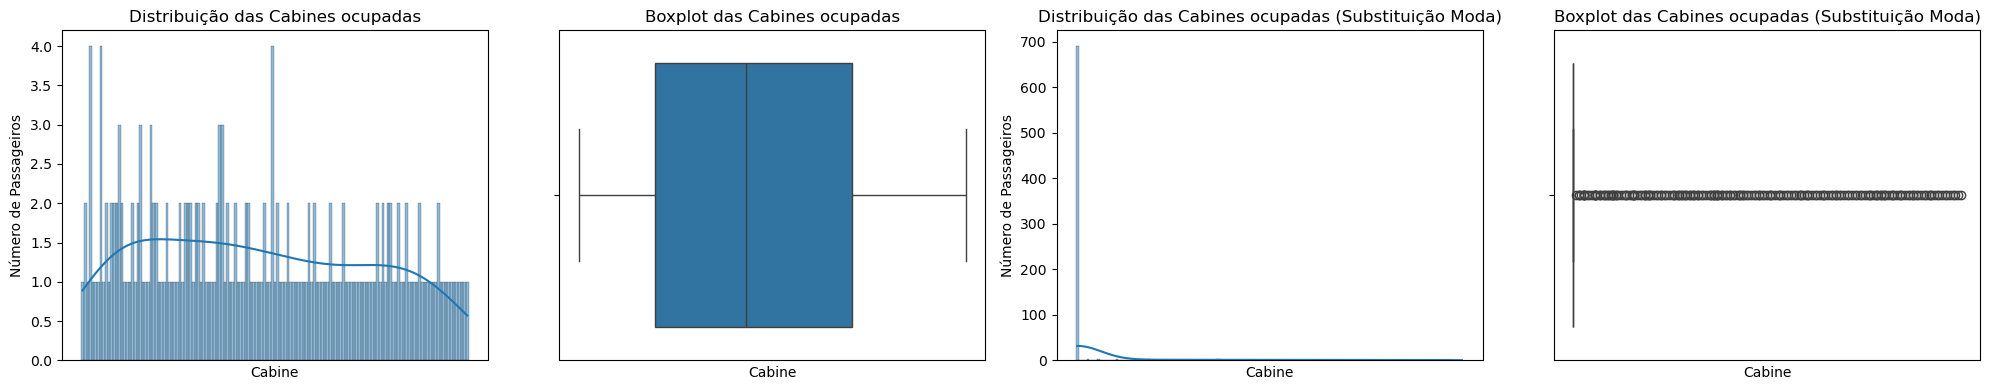

In [11]:
df_copy_normal = df.copy()
df_copy_mode = df.copy()

df_copy_mode['Cabin'] = df_copy_mode['Cabin'].fillna(df_copy_mode['Cabin'].mode()[0])

n_rows = 1
n_coluns = 4

fig, ax = plt.subplots(nrows=n_rows, ncols=n_coluns, figsize=(figsize[0] * n_coluns, figsize[1] * n_rows))

sns.histplot(df_copy_normal['Cabin'], kde=True, ax=ax[0])
ax[0].set_title('Distribuição das Cabines ocupadas')
ax[0].set_xlabel('Cabine')
ax[0].set_ylabel('Número de Passageiros')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_xticks([])

sns.boxplot(x=df_copy_normal['Cabin'], ax=ax[1])
ax[1].set_title('Boxplot das Cabines ocupadas')
ax[1].set_xlabel('Cabine')
ax[1].set_xticks([])


sns.histplot(df_copy_mode['Cabin'], kde=True, ax=ax[2])
ax[2].set_title('Distribuição das Cabines ocupadas (Substituição Moda)')
ax[2].set_xlabel('Cabine')
ax[2].set_ylabel('Número de Passageiros')
ax[2].set_xticks([])

sns.boxplot(x=df_copy_mode['Cabin'], ax=ax[3])
ax[3].set_title('Boxplot das Cabines ocupadas (Substituição Moda)')
ax[3].set_xlabel('Cabine')
ax[3].set_xticks([])

plt.tight_layout()
plt.show()

# Prencher valores nulos

In [12]:
df_substitui_null = df.copy()
df_substitui_null.fillna({'Age': df['Age'].median(), 'Cabin': df['Cabin'].mode()[0], 'Embarked': df['Embarked'].mode()[0]}, inplace=True)

# Valores categóricos

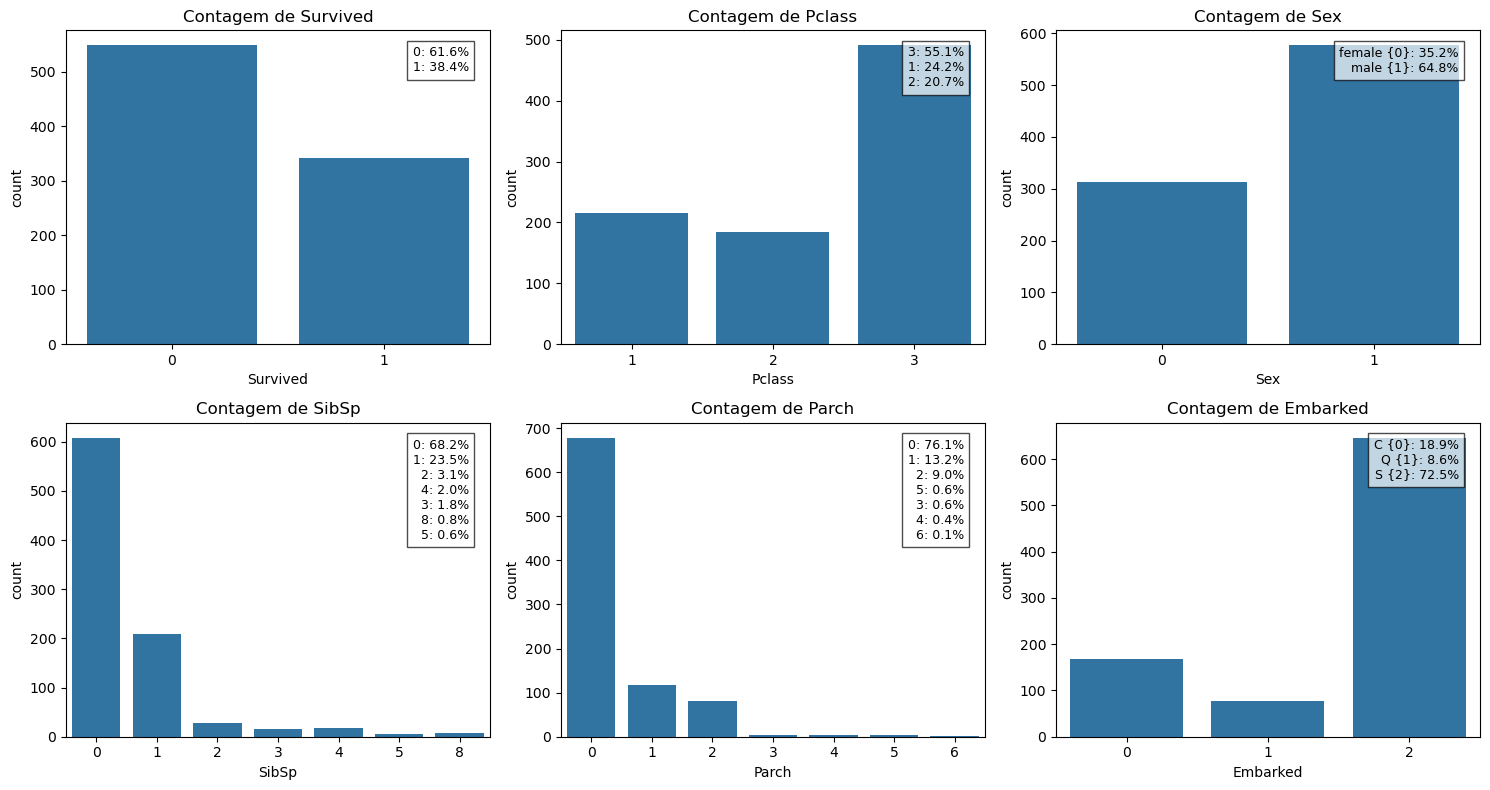

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_convert_categorico = df_substitui_null.copy()

colunas_categoricas = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
colunas_categoricas_replace = ['Sex', 'Embarked']
legendas = {}

# Guardar o mapeamento original (0->female, 1->male, etc.)
for coluna in colunas_categoricas_replace:
    cat = df_convert_categorico[coluna].astype('category')
    df_convert_categorico[coluna] = cat.cat.codes
    legendas[coluna] = dict(enumerate(cat.cat.categories))

# 3 x 3
n_colunas = 3
n_rows = 2
figsize = (5, 4)

fig, ax = plt.subplots(nrows=n_rows, ncols=n_colunas, figsize=(figsize[0] * n_colunas, figsize[1] * n_rows))
ax = ax.flatten()

for idx, col in enumerate(colunas_categoricas):
    total = len(df_convert_categorico[col])
    plot = sns.countplot(data=df_convert_categorico, x=col, ax=ax[idx])
    ax[idx].set_title(f'Contagem de {col}')
    porcentagens = (df_convert_categorico[col].value_counts(normalize=True) * 100).to_dict()

    if col in legendas:
        texto_legenda = "\n".join([
            f"{nome} {{{idx_cat}}}: {porcentagens[idx_cat]:.1f}%"
            for idx_cat, nome in legendas[col].items()
            if idx_cat in porcentagens
        ])
    else:
        texto_legenda = "\n".join([
            f"{cat}: {pct:.1f}%"
            for cat, pct in porcentagens.items()
        ])

    ax[idx].text(0.95, 0.95, texto_legenda, transform=ax[idx].transAxes, fontsize=9, va='top', ha='right', bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))

plt.tight_layout()
plt.show()


# Outliers Cont

In [14]:
df_convert_categorico.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


Outliers na coluna Age: 66
Outliers na coluna Fare: 116
Outliers na coluna SibSp: 46
Outliers na coluna Parch: 213


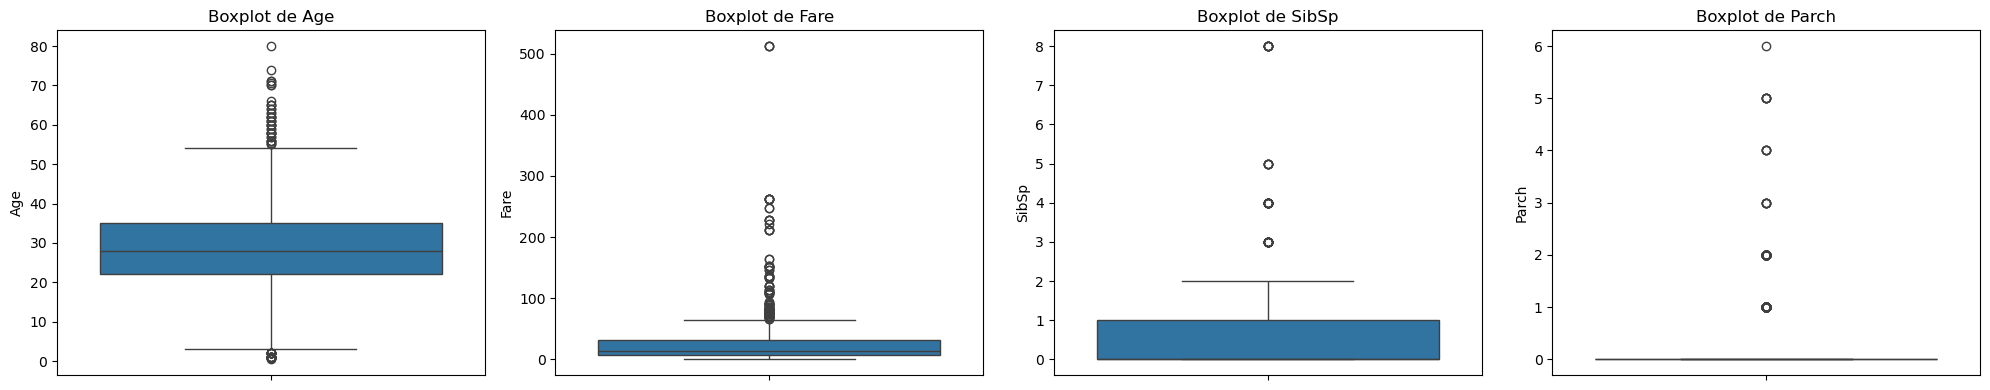

In [15]:
df_copy = df_convert_categorico.copy()
colunas_numericas = ['Age', 'Fare', 'SibSp', 'Parch']

for coluna in colunas_numericas:
    Q1 = df_copy[coluna].quantile(0.25)
    Q3 = df_copy[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df_copy[(df_copy[coluna] < limite_inferior) | (df_copy[coluna] > limite_superior)]
    print(f"Outliers na coluna {coluna}: {outliers.shape[0]}")

n_colunas = 4
n_rows = 1

fig, ax = plt.subplots(nrows=n_rows, ncols=n_colunas, figsize=(figsize[0] * n_colunas, figsize[1] * n_rows))
for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(y=df_copy[coluna], ax=ax[i % n_colunas])
    ax[i % n_colunas].set_title(f'Boxplot de {coluna}')

plt.tight_layout()
plt.show()

## Taxas de sobrevivencia

In [16]:
df_copy = df_convert_categorico.copy()
total = df_copy['Survived'].count()

# Enfase no Sexo

## Morte por sexo geral

In [17]:
sobrevivencia_sex = df_copy.groupby(['Survived', 'Sex']).size()
sobrevivencia_sex = sobrevivencia_sex.reset_index(name='Count')
sobrevivencia_sex['Sex'] = sobrevivencia_sex['Sex'].map({0: 'Female', 1: 'Male'})
sobrevivencia_sex['Survived'] = sobrevivencia_sex['Survived'].map({0: 'Não', 1: 'Sim'})
sobrevivencia_sex['porcentagem'] = sobrevivencia_sex['Count'] / total * 100
sobrevivencia_sex

,Survived,Sex,Count,porcentagem
0,Não,Female,81,9.090909
1,Não,Male,468,52.525253
2,Sim,Female,233,26.150393
3,Sim,Male,109,12.233446


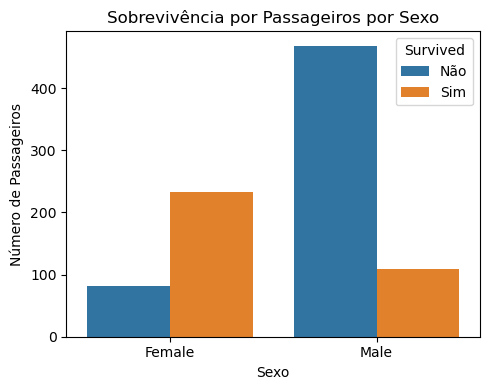

In [18]:
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(data=sobrevivencia_sex, x='Sex', y='Count', hue='Survived', ax=ax)
ax.set_title('Sobrevivência por Passageiros por Sexo')
ax.set_ylabel('Número de Passageiros')
ax.set_xlabel('Sexo')
plt.tight_layout()

## Morte por sexo por Classe social

In [19]:
sobrevivencia_class = df_copy.groupby(['Survived', 'Pclass']).size()
sobrevivencia_class = sobrevivencia_class.reset_index(name='Count')
sobrevivencia_class['Pclass'] = sobrevivencia_class['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})
sobrevivencia_class['Survived'] = sobrevivencia_class['Survived'].map({0: 'Não', 1: 'Sim'})
sobrevivencia_class[:5]

,Survived,Pclass,Count
0,Não,1st,80
1,Não,2nd,97
2,Não,3rd,372
3,Sim,1st,136
4,Sim,2nd,87


In [20]:
sobrevivencia_class_sex = df_copy.groupby(['Survived', 'Pclass', 'Sex']).size().reset_index(name='Count')
sobrevivencia_class_sex['Pclass'] = sobrevivencia_class_sex['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})
sobrevivencia_class_sex['Survived'] = sobrevivencia_class_sex['Survived'].map({0: 'Não', 1: 'Sim'})
sobrevivencia_class_sex['Sex'] = sobrevivencia_class_sex['Sex'].map({0: 'Female', 1: 'Male'})
sobrevivencia_class_sex[:5]

,Survived,Pclass,Sex,Count
0,Não,1st,Female,3
1,Não,1st,Male,77
2,Não,2nd,Female,6
3,Não,2nd,Male,91
4,Não,3rd,Female,72


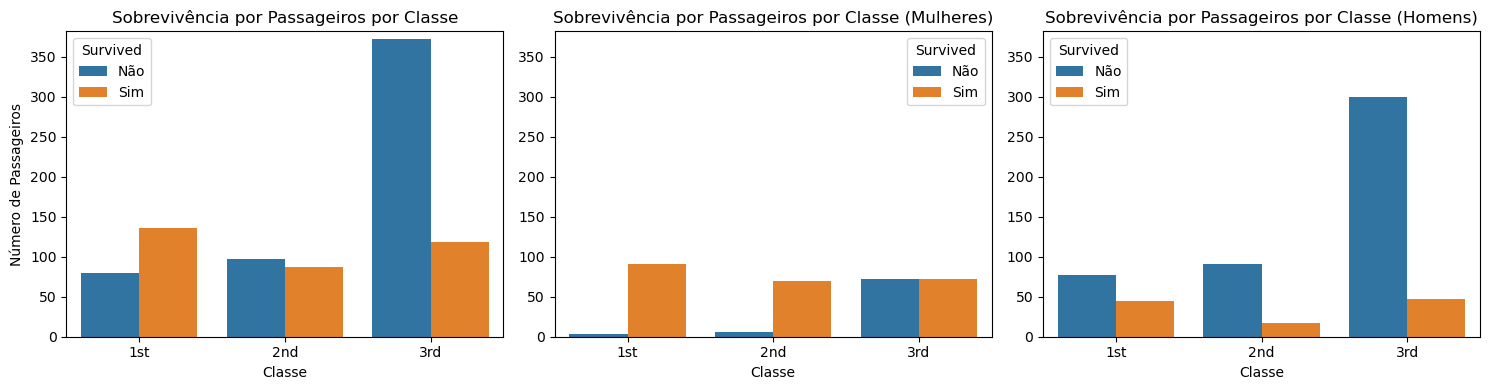

In [21]:
n_coluns = 3
n_rows = 1

fig, ax = plt.subplots(n_rows, n_coluns, figsize=(figsize[0] * n_coluns, figsize[1] * n_rows))

y_max = max(
    sobrevivencia_class['Count'].max(),
    sobrevivencia_class_sex.query("Sex == 'Female'")['Count'].max(),
    sobrevivencia_class_sex.query("Sex == 'Male'")['Count'].max()
) + 10

plots = [
    (sobrevivencia_class, "Sobrevivência por Passageiros por Classe", "Número de Passageiros"),
    (sobrevivencia_class_sex.query("Sex == 'Female'"), "Sobrevivência por Passageiros por Classe (Mulheres)", ""),
    (sobrevivencia_class_sex.query("Sex == 'Male'"), "Sobrevivência por Passageiros por Classe (Homens)", "")
]

for i, (data, title, ylabel) in enumerate(plots):
    sns.barplot(data=data, x="Pclass", y="Count", hue="Survived", ax=ax[i])
    ax[i].set_title(title)
    ax[i].set_xlabel("Classe")
    ax[i].set_ylabel(ylabel)
    ax[i].set_ylim(0, y_max)

plt.tight_layout()
plt.show()


## Morte por sexo por parch
No. de pais / filhos a bordo do Titanic

In [22]:
sobrevivencia_parch = df.groupby(['Parch', 'Survived']).size().reset_index(name='Count')
sobrevivencia_parch['Survived'] = sobrevivencia_parch['Survived'].map({0: 'Não', 1: 'Sim'})
sobrevivencia_parch[:5]

,Parch,Survived,Count
0,0,Não,445
1,0,Sim,233
2,1,Não,53
3,1,Sim,65
4,2,Não,40


In [23]:
sobrevivencia_parch_sex = df_copy.groupby(['Parch', 'Sex', 'Survived']).size().reset_index(name='Count')
sobrevivencia_parch_sex['Sex'] = sobrevivencia_parch_sex['Sex'].map({0: 'Female', 1: 'Male'})
sobrevivencia_parch_sex['Survived'] = sobrevivencia_parch_sex['Survived'].map({0: 'Não', 1: 'Sim'})
sobrevivencia_parch_sex[:5]

,Parch,Sex,Survived,Count
0,0,Female,Não,41
1,0,Female,Sim,153
2,0,Male,Não,404
3,0,Male,Sim,80
4,1,Female,Não,14


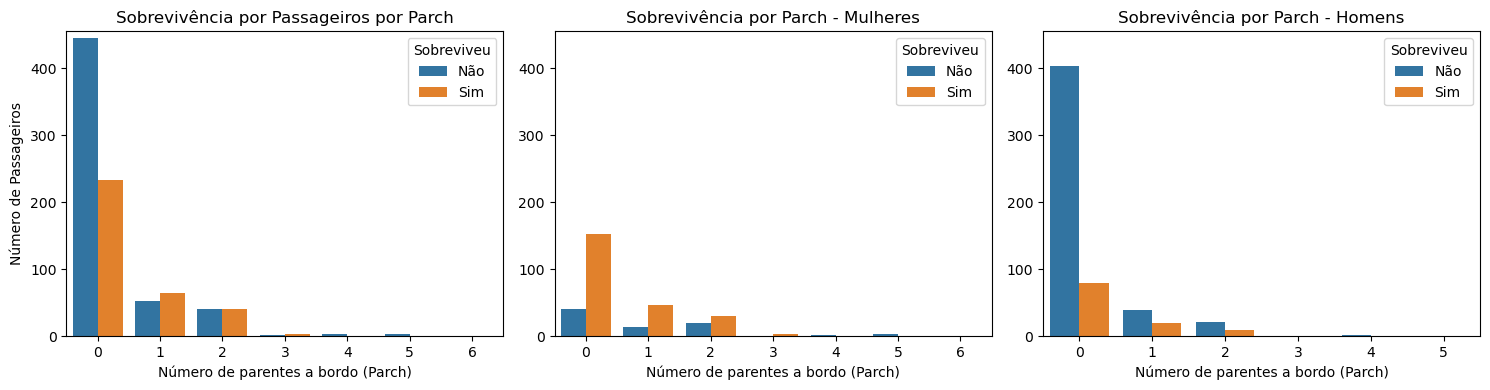

In [24]:
n_coluns = 3
n_rows = 1

fig, ax = plt.subplots(n_rows, n_coluns, figsize=(figsize[0] * n_coluns, figsize[1] * n_rows))

y_max = max(
    sobrevivencia_parch['Count'].max(),
    sobrevivencia_parch_sex.query("Sex == 'Female'")['Count'].max(),
    sobrevivencia_parch_sex.query("Sex == 'Male'")['Count'].max()
) + 10

plots = [
    (sobrevivencia_parch, "Sobrevivência por Passageiros por Parch", "Número de Passageiros"),
    (sobrevivencia_parch_sex.query("Sex == 'Female'"), "Sobrevivência por Parch - Mulheres", ""),
    (sobrevivencia_parch_sex.query("Sex == 'Male'"), "Sobrevivência por Parch - Homens", "")
]

for i, (data, title, ylabel) in enumerate(plots):
    sns.barplot(data=data, x="Parch", y="Count", hue="Survived", ax=ax[i])
    ax[i].set_title(title)
    ax[i].set_xlabel("Número de parentes a bordo (Parch)")
    ax[i].set_ylabel(ylabel)
    ax[i].set_ylim(0, y_max)
    ax[i].legend(title="Sobreviveu")

plt.tight_layout()
plt.show()

## Morte por sexo por SibSp

Número de irmãos/cônjuges a bordo

In [25]:
sobrevivencia_SibSp = df.groupby(['SibSp', 'Survived']).size().reset_index(name='Count')
sobrevivencia_SibSp['Survived'] = sobrevivencia_SibSp['Survived'].map({0: 'Não', 1: 'Sim'})
sobrevivencia_SibSp[:5]

,SibSp,Survived,Count
0,0,Não,398
1,0,Sim,210
2,1,Não,97
3,1,Sim,112
4,2,Não,15


In [26]:
sobrevivencia_SibSp_sex = df_copy.groupby(['SibSp', 'Sex', 'Survived']).size().reset_index(name='Count')
sobrevivencia_SibSp_sex['Sex'] = sobrevivencia_SibSp_sex['Sex'].map({0: 'Female', 1: 'Male'})
sobrevivencia_SibSp_sex['Survived'] = sobrevivencia_SibSp_sex['Survived'].map({0: 'Não', 1: 'Sim'})
sobrevivencia_SibSp_sex[:5]

,SibSp,Sex,Survived,Count
0,0,Female,Não,37
1,0,Female,Sim,137
2,0,Male,Não,361
3,0,Male,Sim,73
4,1,Female,Não,26


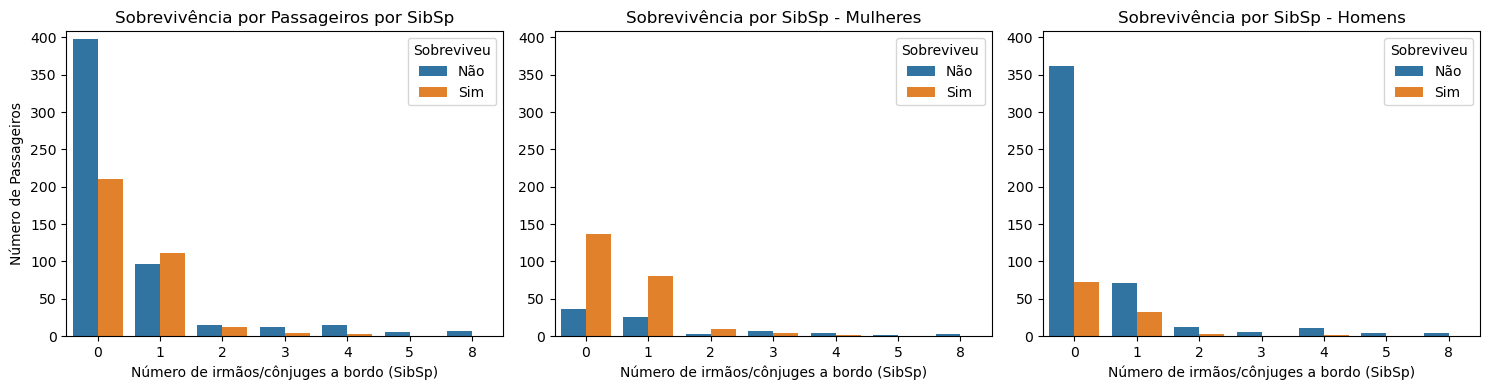

In [27]:
n_coluns = 3
n_rows = 1

fig, ax = plt.subplots(n_rows, n_coluns, figsize=(figsize[0] * n_coluns, figsize[1] * n_rows))

y_max = max(
    sobrevivencia_SibSp['Count'].max(),
    sobrevivencia_SibSp_sex.query("Sex == 'Female'")['Count'].max(),
    sobrevivencia_SibSp_sex.query("Sex == 'Male'")['Count'].max()
) + 10

plots = [
    (sobrevivencia_SibSp, "Sobrevivência por Passageiros por SibSp", "Número de Passageiros"),
    (sobrevivencia_SibSp_sex.query("Sex == 'Female'"), "Sobrevivência por SibSp - Mulheres", ""),
    (sobrevivencia_SibSp_sex.query("Sex == 'Male'"), "Sobrevivência por SibSp - Homens", "")
]

for i, (data, title, ylabel) in enumerate(plots):
    sns.barplot(data=data, x="SibSp", y="Count", hue="Survived", ax=ax[i])
    ax[i].set_title(title)
    ax[i].set_xlabel("Número de irmãos/cônjuges a bordo (SibSp)")
    ax[i].set_ylabel(ylabel)
    ax[i].set_ylim(0, y_max)
    ax[i].legend(title="Sobreviveu")

plt.tight_layout()
plt.show()